# Stroke Death Prediction

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [6]:
import warnings
warnings.filterwarnings('ignore')

### Load the data

In [7]:
raw_df = pd.read_csv('./healthcare-dataset-stroke-data.csv')
raw_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Overview

In [8]:
raw_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
raw_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Visualization

##### Checking Null Values

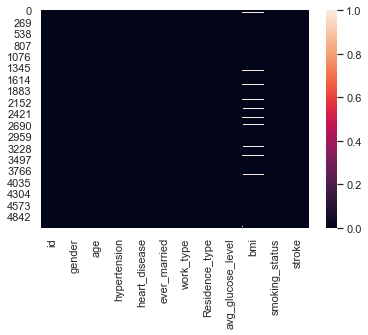

In [11]:
sns.heatmap(raw_df.isnull())

##### Stroke and Gender Relationship

In [12]:
raw_df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

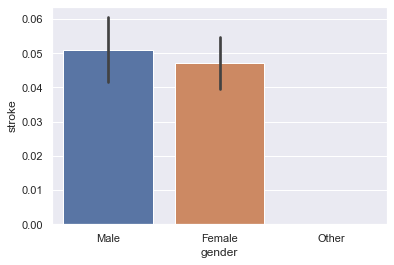

In [13]:
sns.barplot(x='gender',y='stroke',data=raw_df)

##### Stroke and Age Relationship

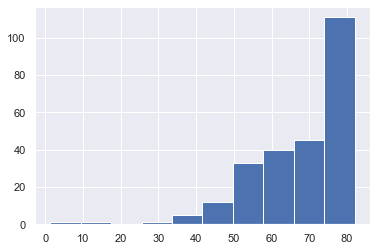

In [14]:
plt.hist(raw_df['age'][raw_df['stroke']==1])
plt.show()

##### Stroke and Hypertension Relationship

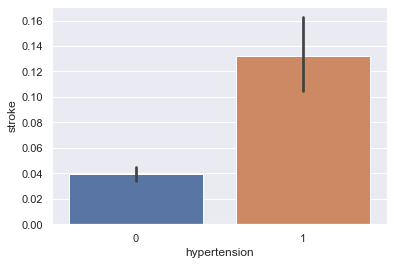

In [15]:
sns.barplot(x='hypertension',y='stroke',data=raw_df)

##### Stroke and Marriage Relationship

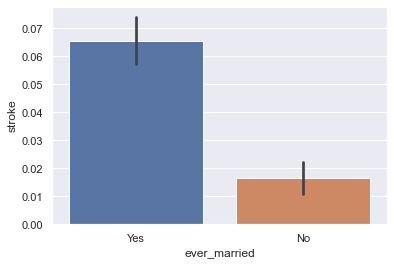

In [16]:
sns.barplot(x='ever_married',y='stroke',data=raw_df)

##### Stroke and Worktype Relationship

In [17]:
raw_df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

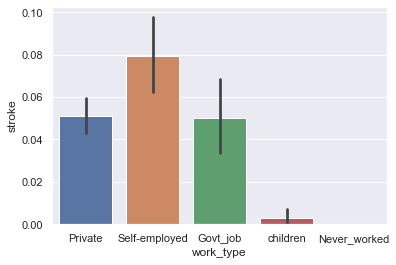

In [18]:
sns.barplot(x='work_type',y='stroke',data=raw_df)

##### Stroke and Worktype Relationship

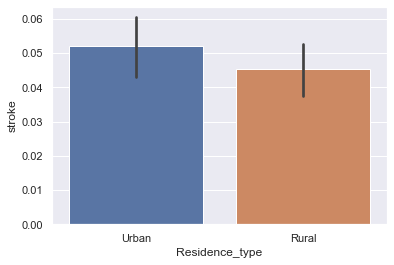

In [19]:
sns.barplot(x='Residence_type',y='stroke',data=raw_df)

##### Stroke and Smoking Status Relationship

In [20]:
raw_df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

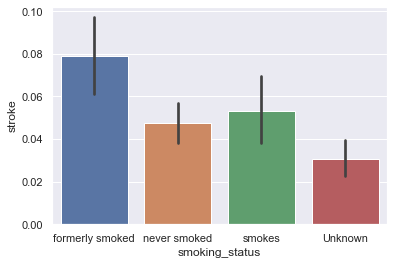

In [21]:
sns.barplot(x='smoking_status',y='stroke',data=raw_df)

##### Stroke and Heart Disease Relationship

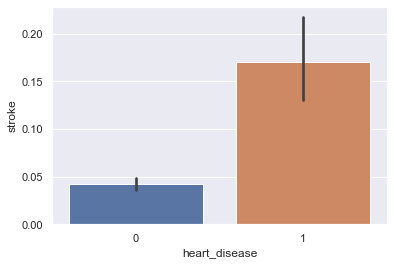

In [22]:
sns.barplot(x='heart_disease',y='stroke',data=raw_df)

##### Stroke and Avg. Glocose Lvl Relationship

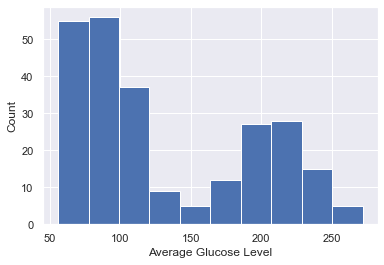

In [23]:
plt.hist(raw_df['avg_glucose_level'][raw_df['stroke']==1])
plt.xlabel('Average Glucose Level')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [24]:
df = raw_df.copy()

In [25]:
df.columns.values

array(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'], dtype=object)

##### Dropping ID

In [26]:
df.drop('id',axis=1,inplace=True)

##### Dropping NA values

In [27]:
df.dropna(inplace=True)

##### Dropping Other gender because of only one row

In [28]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [29]:
df[df['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [30]:
df.drop(df[df['gender']=='Other'].index,inplace=True)

In [31]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

### Categorical to Numerical

##### Married

In [32]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
lb = LabelBinarizer()

In [34]:
df['ever_married'] = lb.fit_transform(df['ever_married'])

In [35]:
df['ever_married'].unique()

array([1, 0])

##### Gender

In [36]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [37]:
le = LabelEncoder()

In [38]:
df['gender'] = le.fit_transform(df['gender'])

In [39]:
df['gender'].unique()

array([1, 0])

##### Residence Type

In [40]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [41]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [42]:
le = LabelEncoder()
df['Residence_type'] = le.fit_transform(df['Residence_type'])

In [43]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1


In [44]:
df['Residence_type'].unique()

array([1, 0])

##### BMI

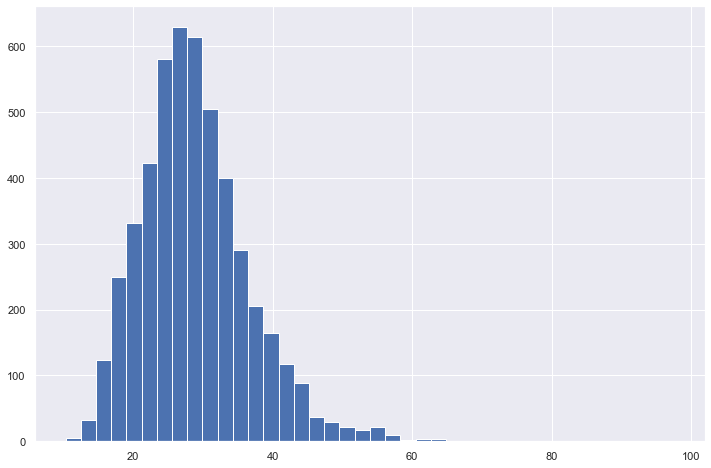

In [45]:
plt.figure(figsize=(12,8))
plt.hist(df['bmi'],bins=40)
plt.show()

### BMI > 40 & BMI < 15 are outliers

In [46]:
df = df[df['bmi']<=40]

In [47]:
df = df[df['bmi']>=15]

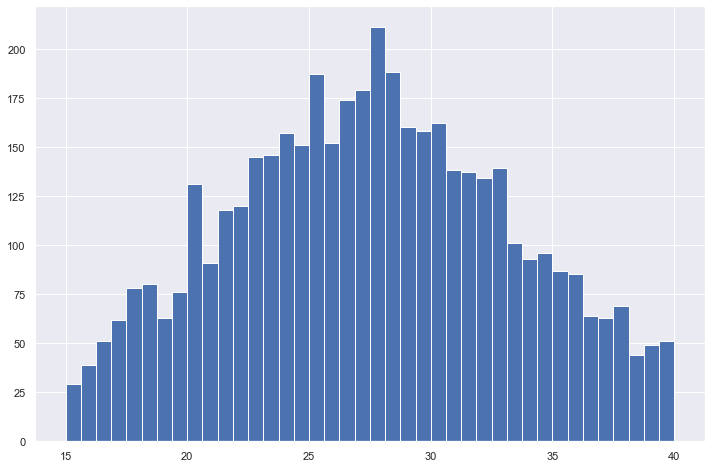

In [48]:
plt.figure(figsize=(12,8))
plt.hist(df['bmi'],bins=40)
plt.show()

In [49]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1


##### Work Type

In [50]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [51]:
dummy_work_type = pd.get_dummies(df['work_type'],drop_first=True)

In [52]:
dummy_work_type.head()

,Never_worked,Private,Self-employed,children
0,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
5,0,1,0,0


In [53]:
df = pd.concat((df,dummy_work_type),axis=1)

In [54]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Never_worked,Private,Self-employed,children
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,0,1,0,0
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,0,1,0,0
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,0,1,0,0
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,0,0,1,0
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1,0,1,0,0


In [55]:
df.drop('work_type',axis=1,inplace=True)

##### Smoking Status

In [56]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [57]:
dummy_smoking_status = pd.get_dummies(df['smoking_status'],drop_first=True)

In [58]:
dummy_smoking_status.head()

,formerly smoked,never smoked,smokes
0,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0


In [59]:
df = pd.concat((df,dummy_smoking_status),axis=1)

In [60]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,1,67.0,0,1,1,1,228.69,36.6,formerly smoked,1,0,1,0,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,never smoked,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,smokes,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,never smoked,1,0,0,1,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,formerly smoked,1,0,1,0,0,1,0,0


In [61]:
df.drop('smoking_status',axis=1,inplace=True)

## Preprocessed Data

In [62]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,1,0,0
6,1,74.0,1,1,1,0,70.09,27.4,1,0,1,0,0,0,1,0
7,0,69.0,0,0,0,1,94.39,22.8,1,0,1,0,0,0,1,0
9,0,78.0,0,0,1,1,58.57,24.2,1,0,1,0,0,0,0,0
10,0,81.0,1,0,1,0,80.43,29.7,1,0,1,0,0,0,1,0
11,0,61.0,0,1,1,0,120.46,36.8,1,0,0,0,0,0,0,1


## Train Test Split & Data Scaling

In [63]:
X = df.drop('stroke',axis=1).values
y = df['stroke'].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [67]:
model = Sequential()

model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=5,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=25)

In [69]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_test,y_test),
          epochs=600,
         callbacks=[early_stop])

Epoch 1/600
112/112 [==============================] - 4s 28ms/step - loss: 0.6042 - accuracy: 0.9574 - val_loss: 0.2429 - val_accuracy: 0.9641
Epoch 2/600
112/112 [==============================] - 0s 3ms/step - loss: 0.2406 - accuracy: 0.9538 - val_loss: 0.1823 - val_accuracy: 0.9641
Epoch 3/600
112/112 [==============================] - 0s 4ms/step - loss: 0.2039 - accuracy: 0.9565 - val_loss: 0.1659 - val_accuracy: 0.9641
Epoch 4/600
112/112 [==============================] - 1s 5ms/step - loss: 0.1998 - accuracy: 0.9538 - val_loss: 0.1528 - val_accuracy: 0.9641
Epoch 5/600
112/112 [==============================] - 0s 3ms/step - loss: 0.1840 - accuracy: 0.9546 - val_loss: 0.1436 - val_accuracy: 0.9641
Epoch 6/600
112/112 [==============================] - 0s 3ms/step - loss: 0.1633 - accuracy: 0.9582 - val_loss: 0.1397 - val_accuracy: 0.9641
Epoch 7/600
112/112 [==============================] - 0s 4ms/step - loss: 0.1727 - accuracy: 0.9542 - val_loss: 0.1361 - val_accuracy: 0.964

## Model Evaluation

In [73]:
eval_df = pd.DataFrame(model.history.history)

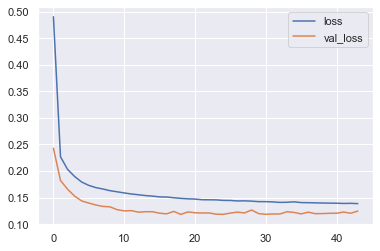

In [75]:
eval_df[['loss','val_loss']].plot()

In [77]:
model.evaluate(X_test,y_test)

28/28 [==============================] - 0s 970us/step - loss: 0.1247 - accuracy: 0.9641


[0.12473529577255249, 0.9641255736351013]

In [78]:
y_hat = (model.predict(X_test) > 0.5).astype("int32")

In [80]:
print(confusion_matrix(y_test,y_hat))

[[860   0]
 [ 32   0]]


In [81]:
print(accuracy_score(y_test,y_hat))

0.9641255605381166


In [82]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       860
           1       0.00      0.00      0.00        32

    accuracy                           0.96       892
   macro avg       0.48      0.50      0.49       892
weighted avg       0.93      0.96      0.95       892



## Model Training on Complete Dataset

In [136]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [137]:
model = Sequential()

model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=5,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [138]:
model.fit(X,y,epochs=40)

Epoch 1/40
140/140 [==============================] - 1s 1ms/step - loss: 0.6850 - accuracy: 0.4971
Epoch 2/40
140/140 [==============================] - 0s 1ms/step - loss: 0.2312 - accuracy: 0.9582
Epoch 3/40
140/140 [==============================] - 0s 1ms/step - loss: 0.1897 - accuracy: 0.9558
Epoch 4/40
140/140 [==============================] - 0s 1ms/step - loss: 0.1931 - accuracy: 0.9525
Epoch 5/40
140/140 [==============================] - 0s 983us/step - loss: 0.1605 - accuracy: 0.9607
Epoch 6/40
140/140 [==============================] - 0s 960us/step - loss: 0.1447 - accuracy: 0.9631
Epoch 7/40
140/140 [==============================] - 0s 990us/step - loss: 0.1570 - accuracy: 0.9585
Epoch 8/40
140/140 [==============================] - 0s 984us/step - loss: 0.1486 - accuracy: 0.9605
Epoch 9/40
140/140 [==============================] - 0s 976us/step - loss: 0.1434 - accuracy: 0.9609
Epoch 10/40
140/140 [==============================] - 0s 983us/step - loss: 0.1508 - accu

## Saving Model

In [140]:
model.save('dl_model_stroke_death_prediction.h5')

In [141]:
import joblib

joblib.dump(scaler,'model_scaler.pkl')

['model_scaler.pkl']